In [1]:
import sys
sys.path.append(sys.path[0].replace('/docs',''))
from group_decomposition import fragfunctions as ff
import rdkit
from rdkit import Chem, rdBase
from rdkit.Chem import BRICS
from rdkit.Chem import AllChem #used for 3d coordinates
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Scaffolds import rdScaffoldNetwork # scaffolding
from rdkit import RDPaths
from rdkit.Chem.Draw import rdMolDraw2D

# Identifying connected fragments

This package has utilities for fragmenting a molecule, or list of molecules, starting from their SMILEs code. So to start, we'll take a random molecule from the Retrievium database by it's SMILEs code:


c1ccc(c(c1)/C=C/C(=O)NNC(=O)NCCCn2cc[nH+]c2)OC(F)(F)F

Below, we create a molecule object to use to view it with RDKit functionality

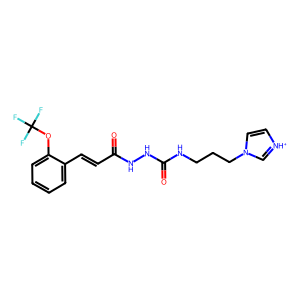

In [2]:
smile1='c1ccc(c(c1)/C=C/C(=O)NNC(=O)NCCCn2cc[nH+]c2)OC(F)(F)F'
mol1 = Chem.MolFromSmiles(smile1)
Draw.MolToImage(mol1)

The functionality provided here will break the molecule as follows:
* into the two rings
* the OCF3 side chain
* the connected non-sp3 carbons in the linker between the rings
* the Ertl functional group(non-carbon atoms and double bonded carbons)


Any additional linkers and any additional peripherals would also be found, and further dissected into alkyl chains and Ertl functional groups

We can find the connected fragments as follows:

[15:34:53] Running LargestFragmentChooser
[15:34:53] Fragment: O=C(/C=C/c1ccccc1OC(F)(F)F)NNC(=O)NCCCn1cc[nH+]c1
[15:34:53] New largest fragment: O=C(/C=C/c1ccccc1OC(F)(F)F)NNC(=O)NCCCn1cc[nH+]c1 (47)


,Smiles,Molecule,numAttachments
0,[2*]n1cc[nH+]c1,,1
1,[2*]CCC[4*],,2
2,[3*]O[5*],,2
3,[1*]/C=C/C(=O)NNC(=O)N[4*],,2
4,[1*]c1ccccc1[3*],,2
5,[5*]C(F)(F)F,,1

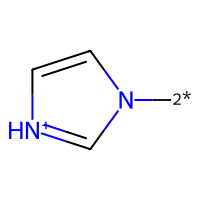
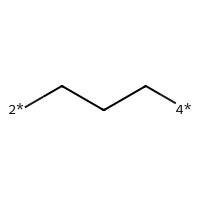
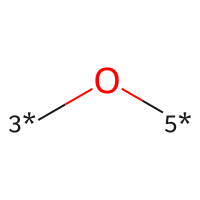
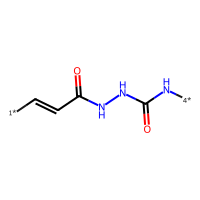
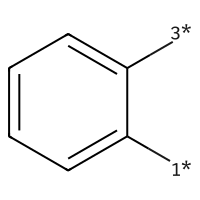
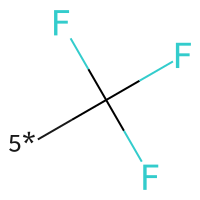

In [3]:
connected_frame = ff.identify_connected_fragments(smile1)
connected_frame

Note here that each point of attachment has dummy atoms (*, RDKit interprets atomic number as 0), that have a numerical label, starting from 1, up to the number of broken bonds. If you pieced together the molecule, attaching the 1 to the 1, the 2 to the 2, etc., you would end up with the parent molecule.


# Identifying and counting unique groups in a molecule

As another functionality, we can count the number of unique groups in a molecule, and their occurence. To do this, let's look at another molecule

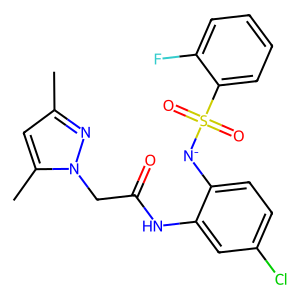

In [4]:
smile2 = 'Cc1cc(n(n1)CC(=O)Nc2cc(ccc2[N-]S(=O)(=O)c3ccccc3F)Cl)C'
mol2 = Chem.MolFromSmiles(smile2)
Draw.MolToImage(mol2)

Here we can see there are two methyl groups, and two benzene rings. First, we do the same step as before, identifying the connected fragments. Then, we pass that to count_uniques, where first we will use the default setting


[15:34:53] Running LargestFragmentChooser
[15:34:53] Fragment: Cc1cc(C)n(CC(=O)Nc2cc(Cl)ccc2[N-]S(=O)(=O)c2ccccc2F)n1
[15:34:53] New largest fragment: Cc1cc(C)n(CC(=O)Nc2cc(Cl)ccc2[N-]S(=O)(=O)c2ccccc2F)n1 (46)


,Smiles,Molecule,count,xyz,numAttachments
0,*F,,1,2\n\nAt 1.057329 0.000000 0.000000\n...,1
1,*c1ccc(*)c(*)c1,,1,12\n\nAt -3.424310 -1.501782 -0.084923\...,3
2,*[N-]S(*)(=O)=O,,1,6\n\nAt 2.397820 1.205930 0.178268\n...,2
3,*C,,2,5\n\nAt 2.055198 -0.016662 0.021027\n...,1
4,*Cl,,1,2\n\nAt 1.268451 0.000000 0.000000\n...,1
5,*NC(*)=O,,1,6\n\nAt -2.587490 0.332728 0.665650\n...,2
6,*c1ccccc1*,,1,12\n\nAt 2.899753 -1.987283 0.009872\...,2
7,*C*,,1,5\n\nAt 1.871900 1.060168 0.014276\n...,2
8,*c1cc(*)n(*)n1,,1,9\n\nAt 3.524027 0.633198 0.145231\n...,3

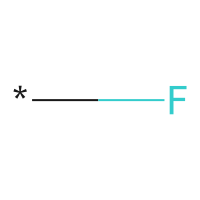
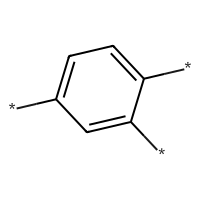
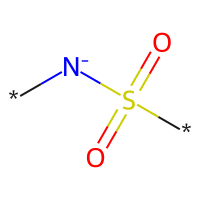
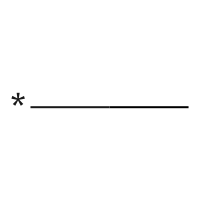
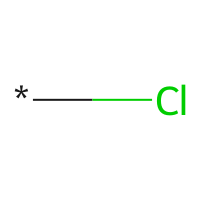
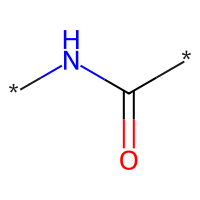
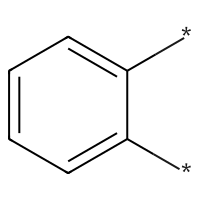
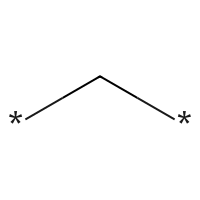
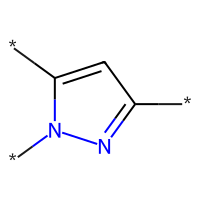

In [5]:
connected_frags_2 = ff.identify_connected_fragments(smile2)
uniqueframe_a = ff.count_uniques(connected_frags_2)
uniqueframe_a

Here, we see the expected results, mostly. We have found two methyl groups, as expected, and all other fragments are unique. Note however, that the two aromatic rings were not matched due to their difference in connectivity. If we wanted those matched, there is the option to drop_attachments, which we will now set to true. Connectivity is not dropped if only one non-placeholder atom is in the fragment. This is to differentiate say a methyl from methylene, or a hydroxyl from an ether.

[15:34:54] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4


,Smiles,Molecule,count,xyz,numAttachments
0,*F,,1,2\n\nAt 1.064090 0.000000 0.000000\n...,1
1,c1ccccc1,,2,12\n\nC 0.474870 -1.311393 0.016760\...,0
2,[N-][SH](=O)=O,,1,5\n\nN 1.570551 -0.274870 -0.203185\n...,0
3,*C,,2,5\n\nAt 2.069735 -0.038327 0.003678\n...,1
4,*Cl,,1,2\n\nAt 1.266680 0.000000 0.000000\n...,1
5,NC=O,,1,6\n\nN -0.682428 -0.074827 -0.092664\n...,0
6,*C*,,1,5\n\nAt 1.883306 1.026085 -0.014572\n...,2
7,*c1cc(*)n(*)n1,,1,9\n\nAt 3.542168 0.618411 -0.250615\n...,3

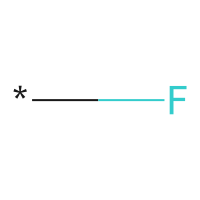
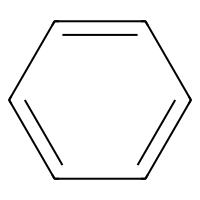
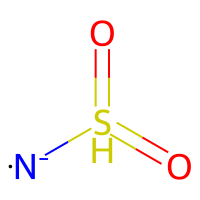
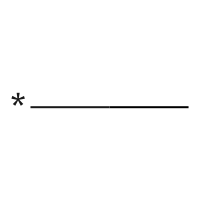
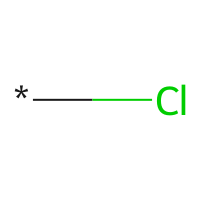
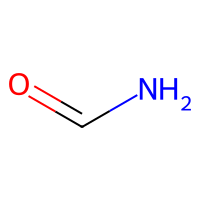
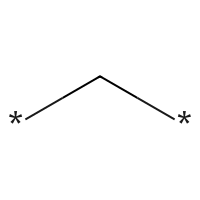
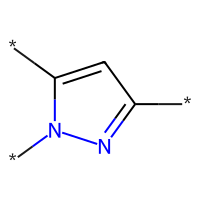

In [6]:
uniqueframe_b = ff.count_uniques(connected_frags_2,drop_attachments=True)
uniqueframe_b

Here, we see that we have now counted the aromatic rings as identical. Further note that attachments remain for one of the molecules. For some reason, after dropping the attachments, the rdKit was unable to produce a molecule from the Smiles, so in that error case we maintain attachments.

# On a set of molecules

The last feature presented here is for performing the fragmenting on a set of molecules and counting the unique fragments. As in previous cases, usage is simple, simply pass a list of strings to the function and the output is similar to count_uniques, but over a set of molecules instead of just one. Using the two molecules we've looked at here:

[15:34:54] Running LargestFragmentChooser
[15:34:54] Fragment: O=C(/C=C/c1ccccc1OC(F)(F)F)NNC(=O)NCCCn1cc[nH+]c1
[15:34:54] New largest fragment: O=C(/C=C/c1ccccc1OC(F)(F)F)NNC(=O)NCCCn1cc[nH+]c1 (47)
[15:34:54] Running LargestFragmentChooser
[15:34:54] Fragment: Cc1cc(C)n(CC(=O)Nc2cc(Cl)ccc2[N-]S(=O)(=O)c2ccccc2F)n1
[15:34:54] New largest fragment: Cc1cc(C)n(CC(=O)Nc2cc(Cl)ccc2[N-]S(=O)(=O)c2ccccc2F)n1 (46)


,Smiles,count,Molecule,numAttachments
0,*c1ccccc1*,2,,2
1,*n1cc[nH+]c1,1,,1
2,*CCC*,1,,2
3,*O*,1,,2
4,*/C=C/C(=O)NNC(=O)N*,1,,2
5,*C(F)(F)F,1,,1
6,*F,1,,1
7,*c1ccc(*)c(*)c1,1,,3
8,*[N-]S(*)(=O)=O,1,,2
9,*C,2,,1

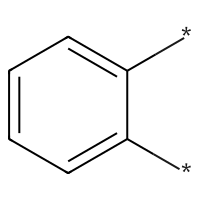
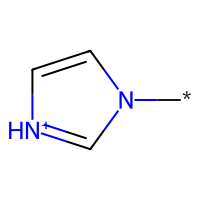
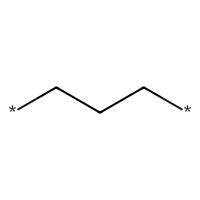
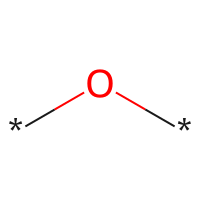
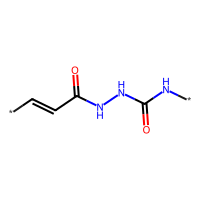
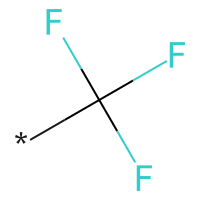
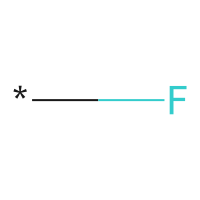
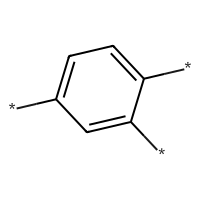
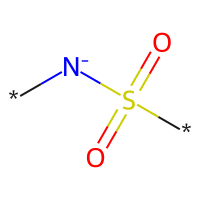
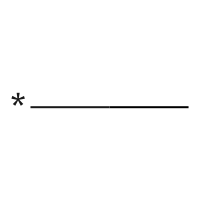
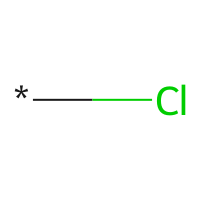
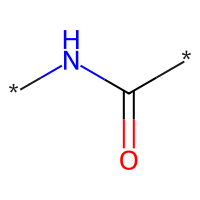
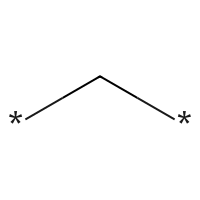
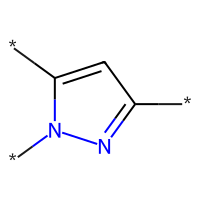

In [7]:
ff.count_groups_in_set([smile1,smile2])